# Numerics

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets

For $\mathcal{E} = \begin{bmatrix} a & b \\ b & d \end{bmatrix}$ to be an SPD, then according to Sylvester's criterion, the surface of the SPD manifold of order 2 is given by $b=\pm\sqrt{ad}(a\geq0,d\geq0)$.

In [2]:
def f(x, y):
    return np.sqrt(x * y), -np.sqrt(x * y)

Here we try two exponentials of $\mathcal{E}$: $\text{exp}_{\Sigma}\mathcal{E}$ with $\Sigma=I$, $\text{exp}_{\Sigma_1}\mathcal{E}$ with $\Sigma_1=\begin{bmatrix} 1 & -1\\-1 & 2\end{bmatrix}$ and $\text{exp}_{\Sigma_2}\mathcal{E}$ with $\Sigma_2=\begin{bmatrix} 2 & 1\\1 & 2\end{bmatrix}$.

(Also functions for sampling from GOE/CGSE/Uniform are provided).

In [3]:
def gen_GOE(d):
    B = np.random.randn(d,d)
    return (B + B.T) / 2

def gen_CGSE(d, Phi):
    if Phi is None:
        Phi = datasets.make_spd_matrix(d**2)
    X = np.random.multivariate_normal(mean=np.zeros(d**2), cov=Phi)
    B = X.reshape((d, d), order='F')
    return (B + B.T) / 2

def gen_uniform(d):
    B = np.random.uniform(low=-1, high=1, size=(d, d))
    return (B + B.T) / 2

def exp_sigma(E, Sigma=None):
    if Sigma is None:
        Sigma = np.identity(np.shape(E)[0])
    X = np.linalg.solve(Sigma, E) # for general square matrices
    D, V = np.linalg.eig(X)
    L = np.diag(np.exp(D))
    return Sigma @ V @ L @ np.linalg.inv(V)


In [4]:
x1 = np.linspace(0, 30, 300)
y1 = np.linspace(0, 30, 300)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f(X1, Y1)[0]
Z2 = f(X1, Y1)[1]


We have $\mathcal{E}\in \text{GOE}$, $\Sigma = I$, $\Sigma_1=\begin{bmatrix} 1 & -1\\-1 & 2\end{bmatrix}$ and $\Sigma_2=\begin{bmatrix} 2 & 1\\1 & 2\end{bmatrix}$, and use the functions defined above to get $\mathcal{E}$ exponentiated.

In [5]:
n = 100000

Sigma = np.array([[1, -1], [-1, 2]])
Sigma2 = np.array([[2, 1], [1, 2]])
a_goe = []
b_goe = []
d_goe = []
lambda_goe = []
a_goe_exp1 = []
b_goe_exp1 = []
d_goe_exp1 = []
lambda_goe_exp1 = []
a_goe_exp2 = []
b_goe_exp2 = []
d_goe_exp2 = []
lambda_goe_exp2 = []
a_goe_exp3 = []
b_goe_exp3 = []
d_goe_exp3 = []
lambda_goe_exp3 = []

for i in range(n):
    X_goe = gen_GOE(2)
    X_goe_exp1 = exp_sigma(X_goe)
    X_goe_exp2 = exp_sigma(X_goe, Sigma)
    X_goe_exp3 = exp_sigma(X_goe, Sigma2)
    lambda_goe.append(list(np.sort(np.linalg.eigvals(X_goe))))
    lambda_goe_exp1.append(list(np.sort(np.linalg.eigvals(X_goe_exp1))))
    lambda_goe_exp2.append(list(np.sort(np.linalg.eigvals(X_goe_exp2))))
    lambda_goe_exp3.append(list(np.sort(np.linalg.eigvals(X_goe_exp3))))
    a_goe.append(X_goe[0, 0])
    b_goe.append(X_goe[0, 1])
    d_goe.append(X_goe[1, 1])
    a_goe_exp1.append(X_goe_exp1[0, 0])
    b_goe_exp1.append(X_goe_exp1[0, 1])
    d_goe_exp1.append(X_goe_exp1[1, 1])
    a_goe_exp2.append(X_goe_exp2[0, 0])
    b_goe_exp2.append(X_goe_exp2[0, 1])
    d_goe_exp2.append(X_goe_exp2[1, 1])
    a_goe_exp3.append(X_goe_exp3[0, 0])
    b_goe_exp3.append(X_goe_exp3[0, 1])
    d_goe_exp3.append(X_goe_exp3[1, 1])


Then we plot the SPD manifold $\mathbb{P}_d$, which is the ambient cone in the following figure, along with the three independent entries of $\mathcal{E}$ and its exponential.

The red represents $\mathcal{E}$ 's sampled from GOE, with the yellow representing $\text{exp}_{I}\mathcal{E}$, blue representing $\text{exp}_{\Sigma_1}\mathcal{E}$ and green representing $\text{exp}_{\Sigma_2}\mathcal{E}$.

C:\Users\leroy\AppData\Local\Temp\ipykernel_1972\3985731339.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


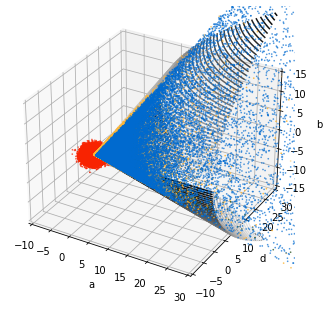

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = Axes3D(fig)
# ax = plt.axes(projection="3d")
plt.xlim(-10,30)
plt.ylim(-10,30)
ax.set_zlim(-15,15)

ax.contour3D(X1, Y1, Z1 ,50, cmap='binary')
ax.contour3D(X1, Y1, Z2 ,50, cmap='binary')

ax.scatter3D(a_goe, d_goe, b_goe, s=0.5, c="#F92301")
ax.scatter3D(a_goe_exp1, d_goe_exp1, b_goe_exp1, s=0.5, c="#FDB638")
ax.scatter3D(a_goe_exp2, d_goe_exp2, b_goe_exp2, s=0.5, c="#006AD0")
ax.scatter3D(a_goe_exp3, d_goe_exp3, b_goe_exp3, s=0.5, c="#385F32")

ax.set_xlabel("a")
ax.set_ylabel("d")
ax.set_zlabel("b")

# if you want to view the plot in an interactive window, deannotate the following command, but in this way it will not be saved.
plt.show()

plt.savefig("GOE-2D.png")


Next, the eigenvalues on 2D of the exponentiated matrices: starting with $\Sigma=I$ and $\lambda_1>\lambda_2$.

Notice that the red line represents $\lambda_1 = \lambda_2$.

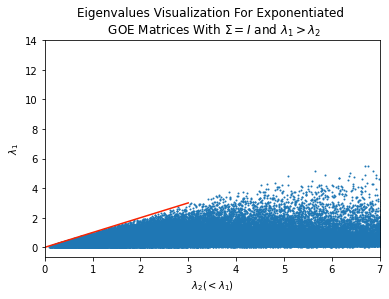

<Figure size 432x288 with 0 Axes>

In [7]:
lambda1 = [x[0] for x in lambda_goe_exp1]
lambda2 = [x[1] for x in lambda_goe_exp1]

fig = plt.figure()
plt.scatter(lambda2, lambda1, s=1)

x = np.linspace(0, 3, 30)
plt.plot(x, x, c="#F92301")

plt.xlabel("$\lambda_2(<\lambda_1)$")
plt.ylabel("$\lambda_1$")
plt.title("Eigenvalues Visualization For Exponentiated \n GOE Matrices With $\Sigma = I$ and $\lambda_1>\lambda_2$")

plt.xlim(0, 7)
# plt.ylim(0,5)
plt.show()
plt.savefig("GOE_I_1.png")


Next we plot the eigenvalues on 2D of the exponentiated matrices where $\Sigma=I$ with $\lambda_1>\lambda_2$ or $\lambda_1\leq\lambda_2$ with equal possibility.

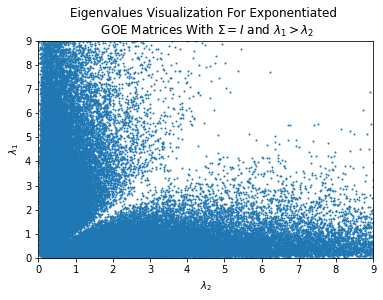

<Figure size 432x288 with 0 Axes>

In [8]:
import random

lambda_goe_exp1_shuffle = []
for i, x in enumerate(lambda_goe_exp1):
    coin = random.uniform(0, 1)
    if coin > 0.5:
        lambda_goe_exp1_shuffle.append(x[::-1])
    else:
        lambda_goe_exp1_shuffle.append(x)

lambda1 = [x[0] for x in lambda_goe_exp1_shuffle]
lambda2 = [x[1] for x in lambda_goe_exp1_shuffle]

fig = plt.figure()
plt.scatter(lambda2, lambda1, s=1)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_1$")
plt.title("Eigenvalues Visualization For Exponentiated \n GOE Matrices With $\Sigma = I$ and $\lambda_1>\lambda_2$")
plt.show()
plt.savefig("GOE_I_2.png")

Next, we plot the eigenvalues on 2D of the exponentiated GOE matrices where $\Sigma=\begin{bmatrix} 1 & -1\\-1 & 2\end{bmatrix}$ and $\lambda_1>\lambda_2$.

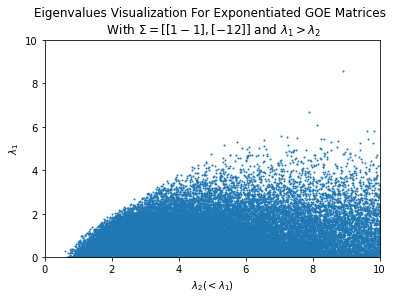

<Figure size 432x288 with 0 Axes>

In [9]:
lambda1 = [x[0] for x in lambda_goe_exp2]
lambda2 = [x[1] for x in lambda_goe_exp2]

fig = plt.figure()
plt.scatter(lambda2, lambda1, s=1)

plt.xlabel("$\lambda_2(<\lambda_1)$")
plt.ylabel("$\lambda_1$")
plt.title("Eigenvalues Visualization For Exponentiated GOE Matrices \n With $\Sigma = [[1 -1], [-1 2]]$ and $\lambda_1>\lambda_2$")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()
plt.savefig("GOE_notI_1.png")

At last, the eigenvalues on 2D of the exponentiated GOE matrices where $\Sigma=\begin{bmatrix} 1 & -1\\-1 & 2\end{bmatrix}$ and $\lambda_1, \lambda_2$ randomly sorted.

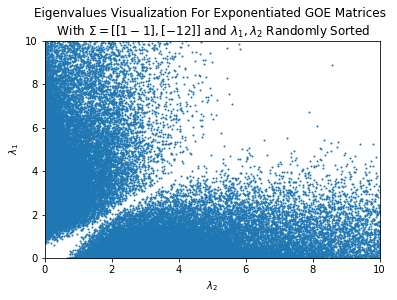

<Figure size 432x288 with 0 Axes>

In [10]:
lambda_goe_exp2_shuffle = []
for i, x in enumerate(lambda_goe_exp2):
    coin = random.uniform(0, 1)
    if coin > 0.5:
        lambda_goe_exp2_shuffle.append(x[::-1])
    else:
        lambda_goe_exp2_shuffle.append(x)

lambda1 = [x[0] for x in lambda_goe_exp2_shuffle]
lambda2 = [x[1] for x in lambda_goe_exp2_shuffle]

fig = plt.figure()
plt.scatter(lambda2, lambda1, s=1)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_1$")
plt.title("Eigenvalues Visualization For Exponentiated GOE Matrices \n With $\Sigma = [[1 -1], [-1 2]]$ and $\lambda_1, \lambda_2$ Randomly Sorted")
plt.show()
plt.savefig("GOE_notI_2.png")